# Exercises

## Simple array manipulation

Investigate the behavior of the statements below by looking
at the values of the arrays a and b after assignments:
```
a = np.arange(5)
b = a
b[2] = -1
b = a[:]
b[1] = -1
b = a.copy()
b[0] = -1
```

Generate a 1D NumPy array containing numbers from -2 to 2
in increments of 0.2. Use optional start and step arguments
of **np.arange()** function.

In [2]:
a = np.arange(-2, 2, 0.2)
print(a)

[ -2.00000000e+00  -1.80000000e+00  -1.60000000e+00  -1.40000000e+00
  -1.20000000e+00  -1.00000000e+00  -8.00000000e-01  -6.00000000e-01
  -4.00000000e-01  -2.00000000e-01  -4.44089210e-16   2.00000000e-01
   4.00000000e-01   6.00000000e-01   8.00000000e-01   1.00000000e+00
   1.20000000e+00   1.40000000e+00   1.60000000e+00   1.80000000e+00]


Generate another 1D NumPy array containing 11 equally
spaced values between 0.5 and 1.5. Extract every second
element of the array

In [3]:
a = np.linspace(0.5, 1.5, 11)
print(a[::2])

[ 0.5  0.7  0.9  1.1  1.3  1.5]


Create a 4x4 array with arbitrary values.

In [4]:
a = np.random.random((4,4))
print(a)

[[ 0.17382811  0.17939998  0.514219    0.85153457]
 [ 0.10051708  0.86110504  0.06392096  0.07348439]
 [ 0.30461684  0.55643921  0.50297691  0.16013406]
 [ 0.59068665  0.00156514  0.8214445   0.77325615]]


Extract every element from the second row

In [5]:
print(a[2,:])

[ 0.30461684  0.55643921  0.50297691  0.16013406]


Extract every element from the third column

In [6]:
print(a[:, 3])

[ 0.85153457  0.07348439  0.16013406  0.77325615]


Assign a value of 0.21 to upper left 2x2 subarray.

In [7]:
a[:2,:2] = 0.2
print(a)

[[ 0.2         0.2         0.514219    0.85153457]
 [ 0.2         0.2         0.06392096  0.07348439]
 [ 0.30461684  0.55643921  0.50297691  0.16013406]
 [ 0.59068665  0.00156514  0.8214445   0.77325615]]


## Simple plotting

Plot to the same graph **sin** and **cos** functions in the interval $[-\pi/2, \pi/2]$. Use $\theta$ as x-label and insert also legends.

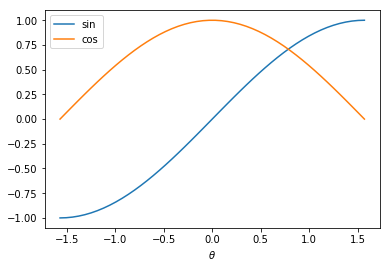

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt
theta = np.linspace(-np.pi / 2, np.pi / 2, 50)
plt.plot(theta, np.sin(theta), label='sin')
plt.plot(theta, np.cos(theta), label='cos')
plt.xlabel(r'$\theta$')
plt.legend()

## Pie chart

The file "../data/csc_usage.txt" contains the usage of CSC servers by different disciplines. Plot a pie chart about the resource usage.

([<matplotlib.patches.Wedge at 0x7fd934cf1518>,
  <matplotlib.text.Text at 0x7fd934d079b0>])

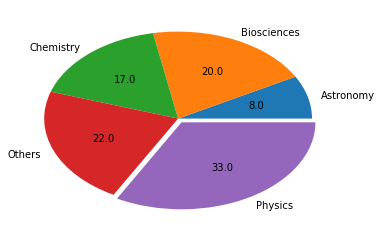

In [9]:
usage = {}
with open('../data/csc_usage.txt') as f:
    f.readline() # read the header
    # read the data into a dictionary
    for line in f:
        line = line.split()
        usage[line[0]] = float(line[1])

labels = list(usage.keys())
fracs = list(usage.values())
# find out the largest fraction and explode that wedge
explode = [0.0 for f in fracs]
maxindex = fracs.index(max(fracs))
explode[maxindex] = 0.05
# make the actual plot
plt.pie(fracs, explode=explode, labels=labels, autopct='%3.1f')


## Bonus exercises

### Numerical derivative with finite differences

Derivatives can be calculated numerically with the finite-difference method
as: 

$$ f'(x_i) = \frac{f(x_i + \Delta x)- f(x_i - \Delta x)}{2 \Delta x} $$

Construct 1D Numpy array containing the values of xi in the interval $[0, \pi/2]$ with spacing
$\Delta x = 0.1$. Evaluate numerically the derivative of **sin** in this
interval (excluding the end points) using the above formula. Try to avoid
`for` loops. Compare the result to function **cos** in the same interval.

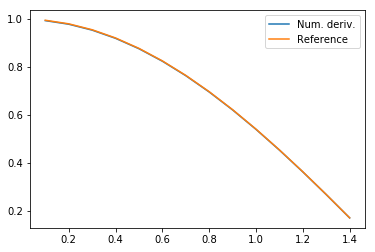

In [10]:
def diff(f, xi, dx):
    fi = f(xi)
    return (fi[2:] - fi[:-2]) / (2.0*dx)

dx = 0.10
xi = np.arange(0, np.pi/2, dx)

dfi = diff(np.sin, xi, dx)
dref = np.cos(xi[1:-1])

plt.plot(xi[1:-1], dfi, label='Num. deriv.')
plt.plot(xi[1:-1], dref, label='Reference')
plt.legend()

### Game of Life
Game of life is a cellular automaton devised by John Conway
in 70's: http://en.wikipedia.org/wiki/Conway's_Game_of_Life

The game consists of two dimensional orthogonal grid of
cells. Cells are in two possible states, alive or dead. Each cell
interacts with its eight neighbours, and at each time step the
following transitions occur:
* Any live cell with fewer than two live neighbours dies, as if
caused by underpopulation
* Any live cell with more than three live neighbours dies, as if
by overcrowding
* Any live cell with two or three live neighbours lives on to
the next generation
* Any dead cell with exactly three live neighbours becomes a
live cell

The initial pattern constitutes the seed of the system, and
the system is left to evolve according to rules. Deads and
births happen simultaneously.

Implement the Game of Life using Numpy, and visualize the
evolution with Matplotlib's **imshow**. Try first 32x32
square grid and cross-shaped initial pattern:
![Initial pattern for Game of Life](../images/gol.png)
Try also other grids and initial patterns (e.g. random
pattern). Try to avoid **for** loops.

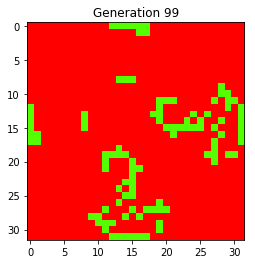

In [12]:
def gol_update(board):
    # number of neighbours that each square has
    neighbours = np.zeros(board.shape)
    neighbours[1:, 1:] += board[:-1, :-1]
    neighbours[1:, :-1] += board[:-1, 1:]
    neighbours[:-1, 1:] += board[1:, :-1]
    neighbours[:-1, :-1] += board[1:, 1:]
    neighbours[:-1, :] += board[1:, :]
    neighbours[1:, :] += board[:-1, :]
    neighbours[:, :-1] += board[:, 1:]
    neighbours[:, 1:] += board[:, :-1]

    new_board = np.where(neighbours < 2, 0, board)
    new_board = np.where(neighbours > 3, 0, new_board)
    new_board = np.where(neighbours == 3, 1, new_board)

    # Periodic boundaries
    new_board[0,:] = new_board[-1,:]
    new_board[:,0] = new_board[:,-1]
    return new_board

# Cross pattern
size = 32
board = np.zeros((size, size), int)
board[size // 2,:] = 1
board[:,size // 2] = 1
plt.imshow(board, cmap = plt.cm.prism)
for iter in range(100):
    board = gol_update(board)
    plt.imshow(board, cmap = plt.cm.prism)
    plt.title('Generation {0}'.format(iter))

